## SurfinPy

#### Tutorial 4 - Pressure vs Temperature

SurfinPy has the functionality to generate phase diagrams as a function of pressure vs temperature.

##### code

In [20]:
from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import data

In [21]:
temperature_range = [298, 299]

In [22]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10, file = 'bulk_vib.yaml', entropy=True, temp_range=temperature_range)

In [23]:

MgO = data.DataSet(cation = 10, x = 0, y = 0, energy = -92.35637426, 
                   label = "Periclase", entropy = True, file = 'MgO_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

Art = data.DataSet(cation = 10, x = 5, y = 20, energy = -467.308589, 
                   label = "Artinite", entropy = True, file = 'Art_vib.yaml', 
                   funits = 5, temp_range=temperature_range)

Bru = data.DataSet(cation = 10, x = 0, y = 10, energy = -227.3449021, 
                   label = "Brucite", entropy = True, file = 'Bru_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

Nes = data.DataSet(cation = 10, x = 10, y = 30, energy = -705.7643942, 
                   label = "Nesquehonite", entropy = True, file = 'Nes_vib.yaml', 
                   funits = 10, temp_range=temperature_range)

Mag = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.3283693, 
                   label = "Magnesite", entropy = True,  file = 'Mag_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

Lan = data.DataSet(cation = 10, x = 10, y = 50, energy = -971.8116011, 
                   label = "Lansfordite", entropy = True, file = 'Lan_vib.yaml', 
                   funits =  10, temp_range=temperature_range)

Hyd = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.6071433, 
                   label = "Hydromagnesite", entropy = True, file = 'Hyd_vib.yaml', 
                   funits =  2, temp_range=temperature_range)

In [24]:
data = [MgO, Art, Bru, Nes,  Mag, Lan, Hyd]

In [25]:
import numpy as np
print(np.arange(273, 274))

[273]


In [26]:
x_energy=-20.53412969
y_energy=-12.83725889

In [27]:
CO2_exp = ut.fit_nist("CO2.txt")[298]
Water_exp = ut.fit_nist("H2O.txt")[298]

CO2_corrected = x_energy + CO2_exp
Water_corrected = y_energy + Water_exp

deltaX = {'Range': [ -1, 0.6],  'Label': 'CO_2'}
deltaY = {'Range': [ -1, 0.6], 'Label': 'H_2O'}

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


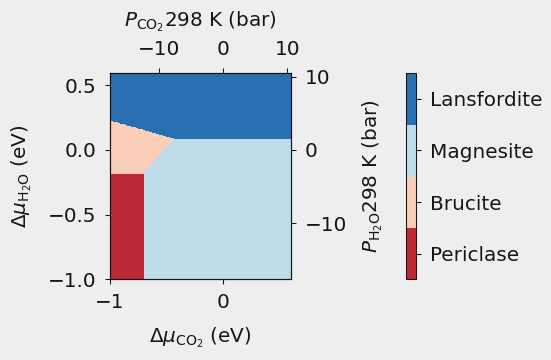

In [28]:
temp_298 = bmvm.calculate(data, bulk, deltaX, deltaY, CO2_corrected, Water_corrected)
temp_298.plot_mu_p(temperature=298, set_style="fast", colourmap="RdBu")